In [74]:
import numpy as np              # imports a fast numerical programming library
import scipy as sp              # imports stats functions, amongst other things
import matplotlib as mpl        # this actually imports matplotlib
import matplotlib.cm as cm      # allows us easy access to colormaps
import matplotlib.pyplot as plt # sets up plotting under plt
import pandas as pd             # lets us handle data as dataframes

import seaborn as sns # gives us more plotting options
sns.set_theme()             # sets up styles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


In [75]:
"""Variables:
Type_of_Renewable_Energy: Numerical code representing the type of renewable energy source (1: Solar, 2: Wind, 3: Hydroelectric, 4: Geothermal, 5: Biomass, 6: Tidal, 7: Wave).
Installed_Capacity_MW: Installed capacity in megawatts (MW).
Energy_Production_MWh: Yearly energy production in megawatt-hours (MWh).
Energy_Consumption_MWh: Yearly energy consumption in megawatt-hours (MWh).
Energy_Storage_Capacity_MWh: Energy storage capacity in megawatt-hours (MWh).
Storage_Efficiency_Percentage: Efficiency of energy storage systems in percentage.
Grid_Integration_Level: Numerical code representing the level of grid integration (1: Fully Integrated, 2: Partially Integrated, 3: Minimal Integration, 4: Isolated Microgrid).
Initial_Investment_USD: Initial investment costs in USD.
Funding_Sources: Numerical code representing the funding source (1: Government, 2: Private, 3: Public-Private Partnership).
Financial_Incentives_USD: Financial incentives in USD.
GHG_Emission_Reduction_tCO2e: Reduction in greenhouse gas emissions in tons of CO2 equivalent (tCO2e).
Air_Pollution_Reduction_Index: Air pollution reduction index.
Jobs_Created: Number of jobs created.

Where I found the dataset: https://www.kaggle.com/datasets/girumwondemagegn/dataset-for-renewable-energy-systems
"""



'Variables:\nType_of_Renewable_Energy: Numerical code representing the type of renewable energy source (1: Solar, 2: Wind, 3: Hydroelectric, 4: Geothermal, 5: Biomass, 6: Tidal, 7: Wave).\nInstalled_Capacity_MW: Installed capacity in megawatts (MW).\nEnergy_Production_MWh: Yearly energy production in megawatt-hours (MWh).\nEnergy_Consumption_MWh: Yearly energy consumption in megawatt-hours (MWh).\nEnergy_Storage_Capacity_MWh: Energy storage capacity in megawatt-hours (MWh).\nStorage_Efficiency_Percentage: Efficiency of energy storage systems in percentage.\nGrid_Integration_Level: Numerical code representing the level of grid integration (1: Fully Integrated, 2: Partially Integrated, 3: Minimal Integration, 4: Isolated Microgrid).\nInitial_Investment_USD: Initial investment costs in USD.\nFunding_Sources: Numerical code representing the funding source (1: Government, 2: Private, 3: Public-Private Partnership).\nFinancial_Incentives_USD: Financial incentives in USD.\nGHG_Emission_Reduct

In [76]:
#import dataset into DataFrame
EnergyDF = pd.read_csv('energy_dataset_.csv')
#Inspect attributes of dataset
EnergyDF.info()
EnergyDF.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type_of_Renewable_Energy       15000 non-null  int64  
 1   Installed_Capacity_MW          15000 non-null  float64
 2   Energy_Production_MWh          15000 non-null  float64
 3   Energy_Consumption_MWh         15000 non-null  float64
 4   Energy_Storage_Capacity_MWh    15000 non-null  float64
 5   Storage_Efficiency_Percentage  15000 non-null  float64
 6   Grid_Integration_Level         15000 non-null  int64  
 7   Initial_Investment_USD         15000 non-null  float64
 8   Funding_Sources                15000 non-null  int64  
 9   Financial_Incentives_USD       15000 non-null  float64
 10  GHG_Emission_Reduction_tCO2e   15000 non-null  float64
 11  Air_Pollution_Reduction_Index  15000 non-null  float64
 12  Jobs_Created                   15000 non-null 

,Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000
mean,3.973933,495.855747,252350.955621,225981.854966,5030.196472,75.219334,2.501267,2.514849e+08,2.004000,1.002977e+07,25234.722158,50.724179,2502.668600
std,1.999380,288.212872,144062.915425,129223.677997,2894.096326,14.485289,1.123306,1.432843e+08,0.817493,5.787303e+06,14378.915277,28.556578,1451.212661
min,1.000000,1.091767,1030.103692,584.048006,2.200208,50.003494,1.000000,1.008107e+06,1.000000,5.155842e+04,100.974460,1.009712,10.000000
25%,2.000000,245.475737,128568.875900,115587.428225,2543.341380,62.694076,1.000000,1.259709e+08,1.000000,4.963454e+06,12754.476927,26.224426,1228.000000
50%,4.000000,492.907555,253216.871250,225226.374350,5054.036248,75.279702,3.000000,2.539910e+08,2.000000,1.002414e+07,25424.477000,50.250207,2496.000000
75%,6.000000,742.254682,377083.805575,338656.214700,7536.935405,87.754318,4.000000,3.759130e+08,3.000000,1.507417e+07,37750.426285,75.720133,3765.000000
max,7.000000,999.982979,499991.200400,449922.667800,9999.145037,99.994955,4.000000,4.999407e+08,3.000000,1.999855e+07,49997.578530,99.980494,4999.000000


Text(0, 0.5, 'Total Energy Production (MWh)')

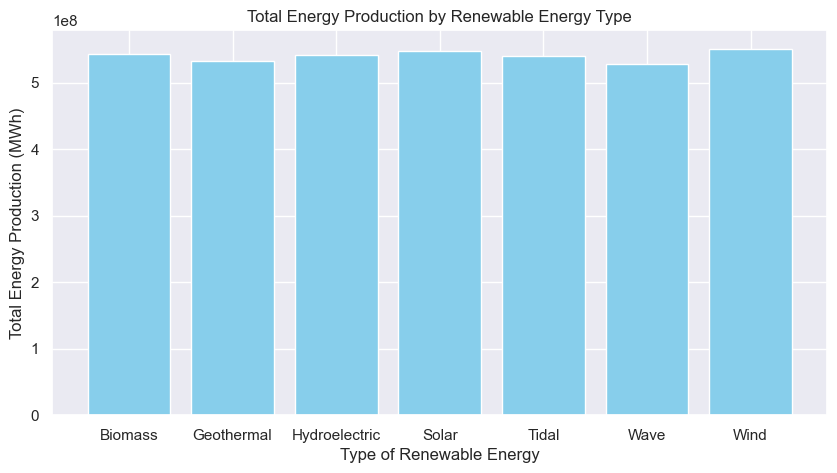

In [77]:
#Next steps, begin looking into ways that other predictors work into the 
#"Energy Production" predictor

energy_type_map = {
    1: 'Solar',
    2: 'Wind',
    3: 'Hydroelectric',
    4: 'Geothermal',
    5: 'Biomass',
    6: 'Tidal',
    7: 'Wave'
}
EnergyDF['Energy_Type'] = EnergyDF['Type_of_Renewable_Energy'].map(energy_type_map)
#Using EnergyProdDF for now

EnergyProdDF = EnergyDF.groupby('Energy_Type')['Energy_Production_MWh'].sum().reset_index()

plt.figure(figsize=(10,5))
plt.bar(EnergyProdDF['Energy_Type'], EnergyProdDF['Energy_Production_MWh'], color='skyblue')
plt.title('Total Energy Production by Renewable Energy Type')
plt.xlabel('Type of Renewable Energy')
plt.ylabel('Total Energy Production (MWh)')


Now that we can see that there are CLEAR differences within the data, lets begin discovering which is 'best'.


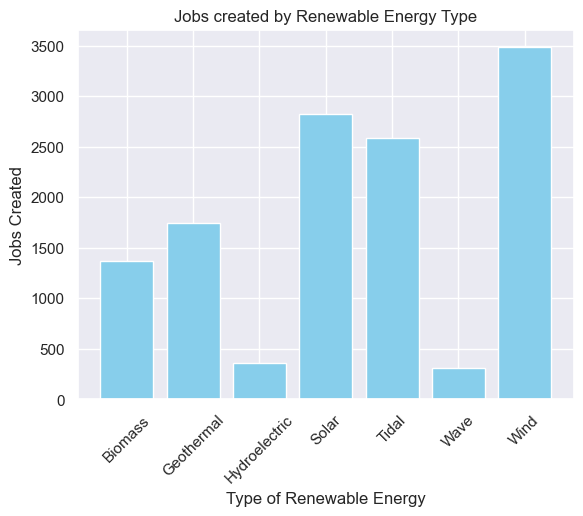

In [78]:
"""However, is there some correlation between the amount of energy produced
and jobs being produced?"""

EnergyProdDF["Jobs_Created"] = EnergyDF['Jobs_Created']
plt.bar(EnergyProdDF['Energy_Type'], EnergyProdDF['Jobs_Created'], color='skyblue')
plt.title('Jobs created by Renewable Energy Type')
plt.xlabel('Type of Renewable Energy')
plt.ylabel('Jobs Created')
plt.xticks(rotation=45)

#Interesting. A clearly disproportionate amount of jobs being created based on type of energy
print("Now that we can see that there are CLEAR differences within the data, lets begin discovering which is 'best'.")

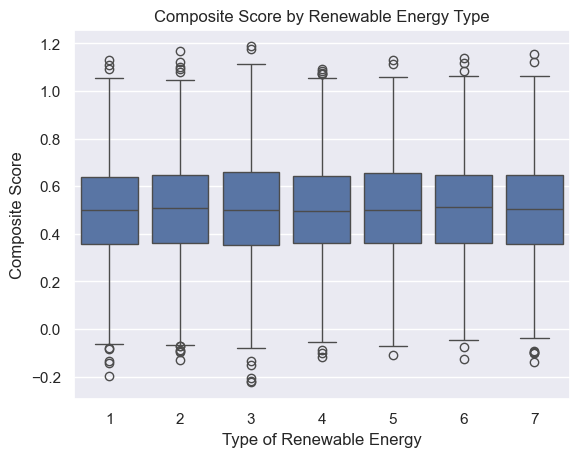

In [79]:
#How to do that? Composite target variable.


featureList = [
    'Type_of_Renewable_Energy',
    'Installed_Capacity_MW',
    'Energy_Production_MWh',
    'Energy_Consumption_MWh',
    'Energy_Storage_Capacity_MWh',
    'Storage_Efficiency_Percentage',
    'Grid_Integration_Level',
    'Initial_Investment_USD',
    'Funding_Sources',
    'Financial_Incentives_USD',
    'GHG_Emission_Reduction_tCO2e',
    'Air_Pollution_Reduction_Index',
    'Jobs_Created'
]

scaler = MinMaxScaler()
normalized = scaler.fit_transform(EnergyDF[featureList])
normalized_df = pd.DataFrame(normalized, columns=[col + "_norm" for col in featureList])


for col in normalized_df.columns:
    EnergyDF[col] = normalized_df[col]

#Assigning weights
weights = {
    'Installed_Capacity_MW_norm': 0.1,
    'Energy_Production_MWh_norm': 0.3,
    'Energy_Consumption_MWh_norm': -0.4,  # lower consumption = better?
    'Energy_Storage_Capacity_MWh_norm': 0.3,
    'Storage_Efficiency_Percentage_norm': 0.3,
    'Grid_Integration_Level_norm': 0.05,
    'Initial_Investment_USD_norm': -0.15,  # lower cost = better?
    'Financial_Incentives_USD_norm': 0.1,
    'GHG_Emission_Reduction_tCO2e_norm': 0.15,
    'Air_Pollution_Reduction_Index_norm': 0.15,
    'Jobs_Created_norm': 0.1
}

EnergyDF['composite_score'] = sum(
    EnergyDF[feature] * weight for feature, weight in weights.items()
)
sns.boxplot(x='Type_of_Renewable_Energy', y='composite_score', data=EnergyDF)
plt.title("Composite Score by Renewable Energy Type")
plt.xlabel("Type of Renewable Energy")
plt.ylabel("Composite Score")
plt.show()


In [80]:
EnergyDF_sorted = EnergyDF.sort_values(by='composite_score', ascending=False)
top_10 = EnergyDF_sorted.head(10)
print(top_10[['Type_of_Renewable_Energy', 'composite_score']])
print("Based on this, seemingly the 'best' type of Renwewable energy is hydroelectricity.")


       Type_of_Renewable_Energy  composite_score
3449                          3         1.187409
7274                          3         1.177321
14290                         2         1.168346
2995                          7         1.154774
9777                          6         1.140304
5883                          5         1.131244
2203                          1         1.129772
1051                          2         1.123619
5415                          7         1.123232
10649                         6         1.118866
Based on this, seemingly the 'best' type of Renwewable energy is hydroelectricity.


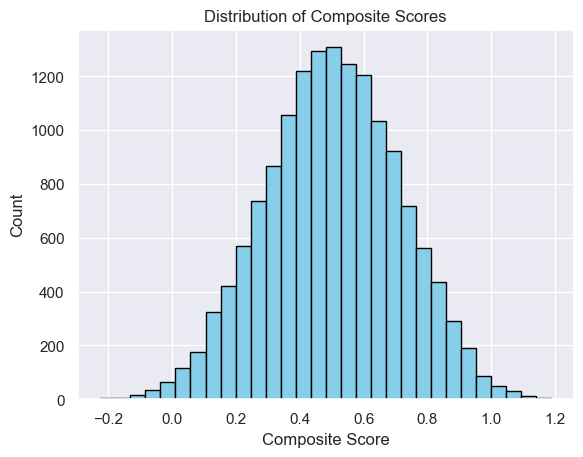

In [81]:
plt.hist(EnergyDF['composite_score'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Composite Scores")
plt.xlabel("Composite Score")
plt.ylabel("Count")
plt.show()

In [82]:
energyCompScores = EnergyDF.groupby("Type_of_Renewable_Energy")['composite_score'].agg(['mean', 'std', 'count'])
print(energyCompScores)
print("Due to the mean of the composite score being mostly in the 0.4-0.6 range, it makes sense that the means are so close together.")

                              mean       std  count
Type_of_Renewable_Energy                           
1                         0.498632  0.207078   2169
2                         0.503066  0.209485   2202
3                         0.503585  0.217441   2157
4                         0.499328  0.204273   2105
5                         0.507836  0.207412   2150
6                         0.506080  0.207637   2124
7                         0.501057  0.212208   2093
Due to the mean of the composite score being mostly in the 0.4-0.6 range, it makes sense that the means are so close together.


In [83]:
#Create regression model
X = EnergyDF.drop(columns=['composite_score', 'Type_of_Renewable_Energy'])
X = pd.get_dummies(X, drop_first=True)

y = EnergyDF["composite_score"]
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("High r2 score means high explaination of variance, but a value of 1 (perfect) is suspicious.")
print("An extremely low MSE indicates")
print("Lets try other models!")



MSE: 2.37743501513928e-25
R² Score: 1.0
High r2 score means high explaination of variance, but a value of 1 (perfect) is suspicious.
Lets try other models!


R2 score:  0.920258934772351
Interesting, a lower score than before. What does it mean?


<Axes: title={'center': 'Feature Importance'}>

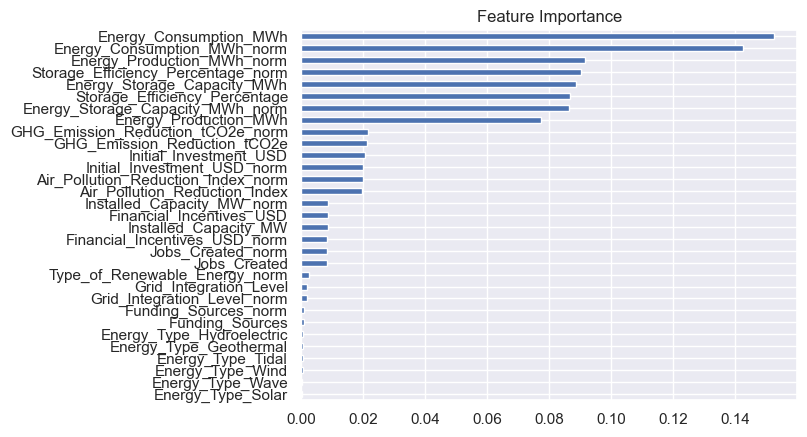

In [84]:
randForest = RandomForestRegressor(n_estimators=200, random_state=42)
randForest.fit(x_train, y_train)
print("R2 score: ", randForest.score(x_test, y_test))
print("Interesting, a lower score than before. What does it mean?")

importances = pd.Series(randForest.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title="Feature Importance")


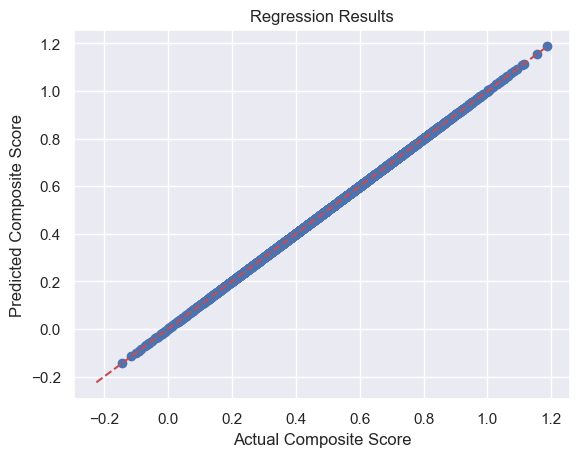

In [85]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Composite Score")
plt.ylabel("Predicted Composite Score")
plt.title("Regression Results")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

In [86]:
print("So, this shows clearly that my model excellently handles predictions based on the composite value!")
print("Now, lets understand some relationships between variables.")

So, this shows clearly that my model excellently handles predictions based on the composite value!
Now, lets understand some relationships between variables.


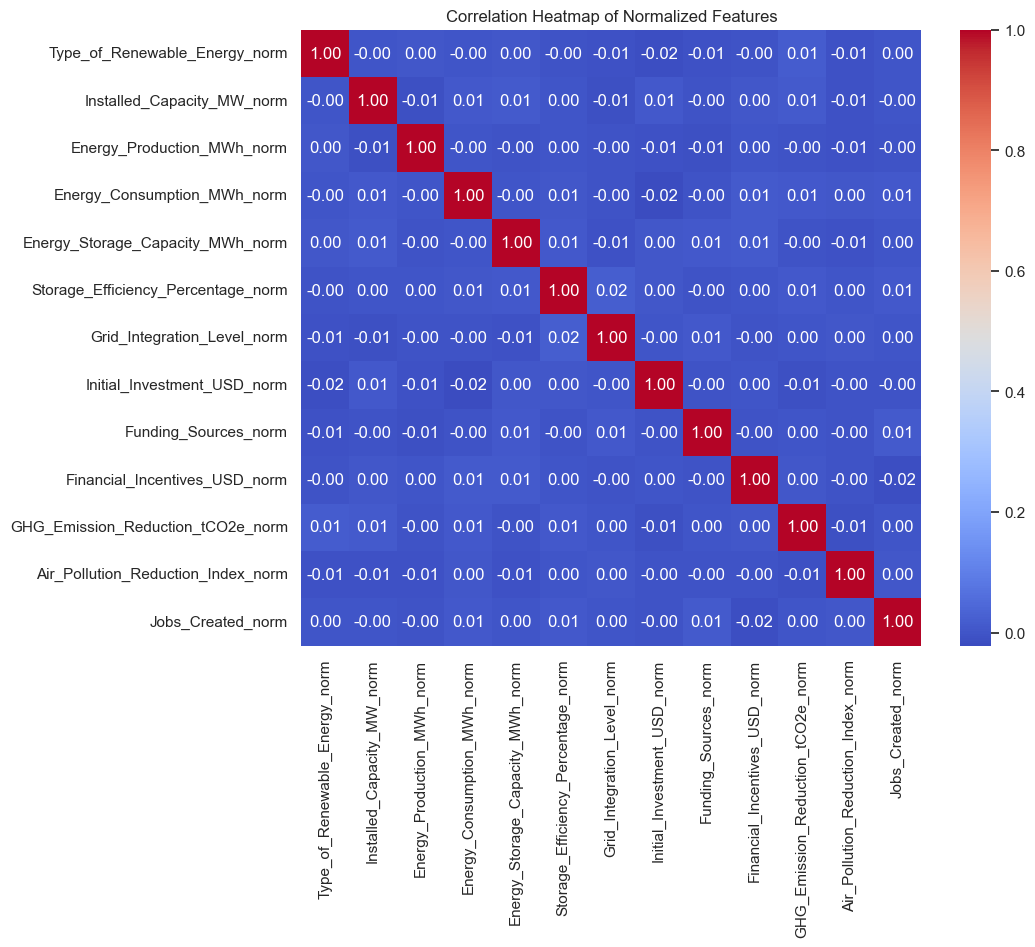

How anticlimatic.
Lets check the corelation between the composite core and the normalize features!


In [87]:
features = EnergyDF[[col for col in EnergyDF.columns if 'norm' in col]] #I ONLY want normalized
corr = features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Normalized Features")
plt.show()
print("How anticlimatic.")
print("Lets check the corelation between the composite core and the normalize features!")

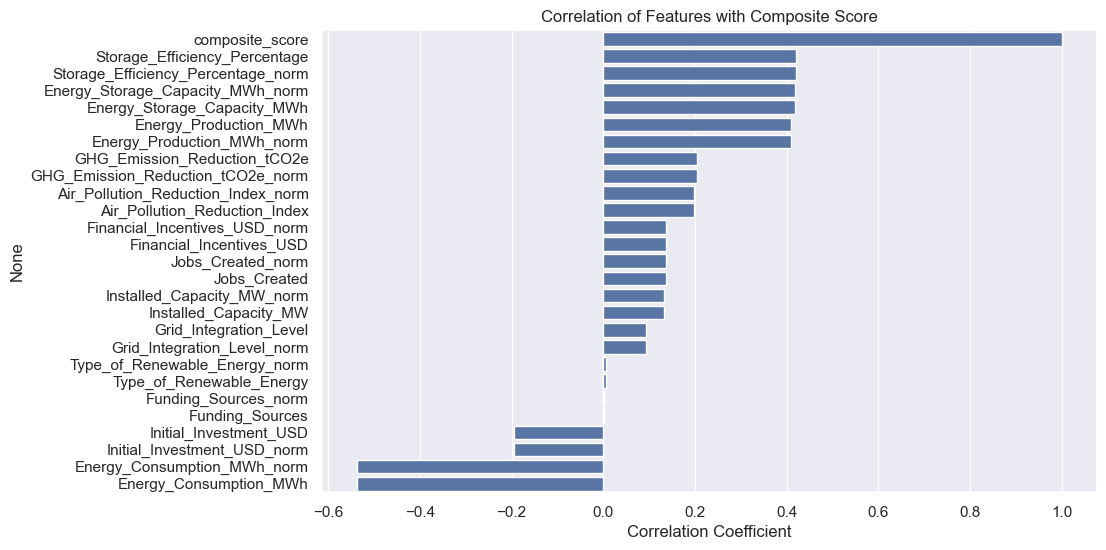

In [88]:
numeric_df = EnergyDF.select_dtypes(include='number')

targetCorr = numeric_df.corr()["composite_score"].sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x=targetCorr.values, y=targetCorr.index)
plt.title("Correlation of Features with Composite Score")
plt.xlabel("Correlation Coefficient")
plt.show()

In [89]:
print("So, now we see that the most significant normalized variables are")
print("Storage Efficiency, Storage Capacity and Energy Production.")
print("What types of renewable energy systems have these qualities?")

So, now we see that the most significant normalized variables are
Storage Efficiency, Storage Capacity and Energy Production.
What types of renewable energy systems have these qualities?


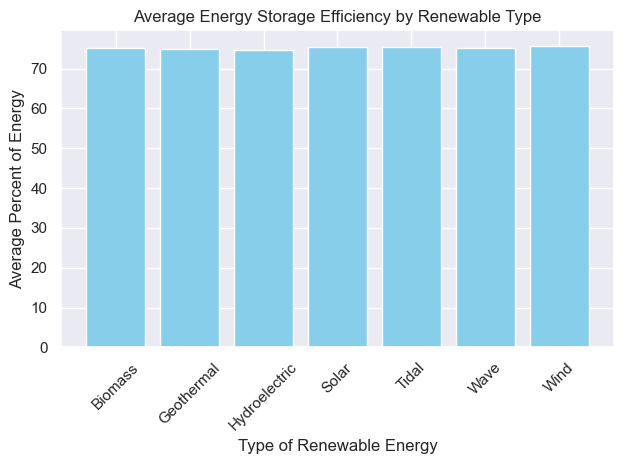

So, Storage Efficiency is visually quite similar


In [91]:
grouped = EnergyDF.groupby('Energy_Type')['Storage_Efficiency_Percentage'].mean()

plt.bar(grouped.index, grouped.values, color='skyblue')
plt.title('Average Energy Storage Efficiency by Renewable Type')
plt.xlabel('Type of Renewable Energy')
plt.ylabel('Average Percent of Energy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("So, Storage Efficiency is visually quite similar.")

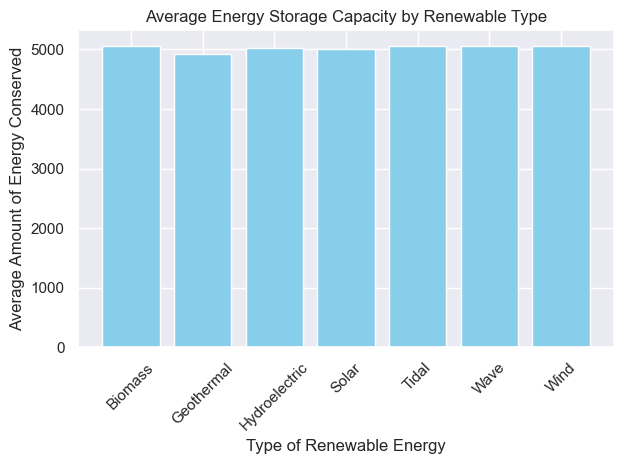

In [92]:
grouped = EnergyDF.groupby('Energy_Type')['Energy_Storage_Capacity_MWh'].mean()

plt.bar(grouped.index, grouped.values, color='skyblue')
plt.title('Average Energy Storage Capacity by Renewable Type')
plt.xlabel('Type of Renewable Energy')
plt.ylabel('Average Amount of Energy Conserved')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Biomass'),
  Text(1, 0, 'Geothermal'),
  Text(2, 0, 'Hydroelectric'),
  Text(3, 0, 'Solar'),
  Text(4, 0, 'Tidal'),
  Text(5, 0, 'Wave'),
  Text(6, 0, 'Wind')])

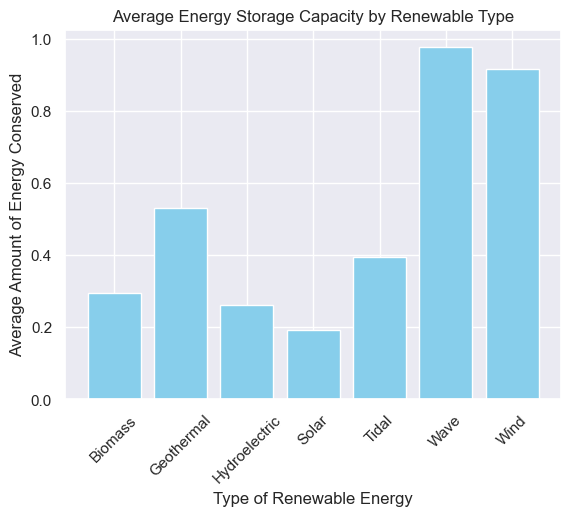

In [94]:
EnergyProdDF["Energy_Storage_Capacity_MWh"] = EnergyDF['Energy_Storage_Capacity_MWh_norm']
plt.bar(EnergyProdDF['Energy_Type'], EnergyProdDF['Energy_Storage_Capacity_MWh'], color='skyblue')
plt.title('Average Energy Storage Capacity by Renewable Type')
plt.xlabel('Type of Renewable Energy')
plt.ylabel('Average Amount of Energy Conserved')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Biomass'),
  Text(1, 0, 'Geothermal'),
  Text(2, 0, 'Hydroelectric'),
  Text(3, 0, 'Solar'),
  Text(4, 0, 'Tidal'),
  Text(5, 0, 'Wave'),
  Text(6, 0, 'Wind')])

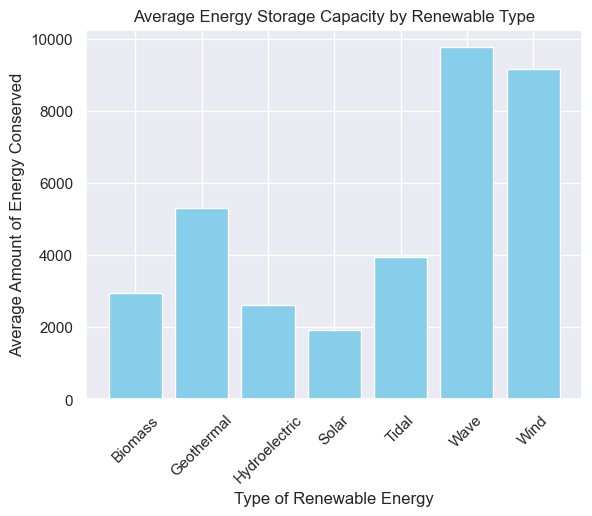